# Student and Alcohol consumption

__Context:__
---

The data were obtained in a survey of 648 students from 15 to 22 year olds in Portuguese language courses in 2 schools. It contains a lot of interesting social, gender and study information about students. We are going to find out: 
    * If drinking habit affected to grades,
    * What are the general behaviors/situations of drinking students, 
    * What should we do to be able to drink and still get good grades?

__Content:__ 
---

Attributes for student-por.csv (Portuguese language course) datasets:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)
* Grades:
    * G1 - first period grade (numeric: from 0 to 20); 
    * G2 - second period grade (numeric: from 0 to 20);
    * G3 - final grade (numeric: from 0 to 20, output target)

**Structure:** 
* Part I: Exploring the data set
    * Breakdown for a better understanding
 
* Part II: A closer Observation 
    *    A - How are the drinkers doing? 
    *    B - Grades & Other features
    *    C - Correlation between features - Decisive factor for having a good grade? 

* Part III: Using RDF, DCT to predict Fail/Pass

# PART I: EXPLORING THE DATA SET

In [495]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [496]:
data = pd.read_csv('Stu_Alcohol Consumption.csv')

In [497]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [498]:
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [499]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [500]:
data.shape

(649, 33)

## Breakdown for a better understanding: 
    As the data set has so many features with different variants, the codes above couldn't present it clear enough, I decide to visualise some categories to help us to have an overal idea about the data. They will be put side by side per group as below: 
    * Gender - Age - Add
    * Medu - Fedu - Mjob - Fjob
    * Famsize - Pstatus - Famrel 
    * Study time - Freetime - Goout
    * Extra activities - Internet -  Health 
    * Romantic
    * Dalc - Walc 
    * G1 - G2 - G3 

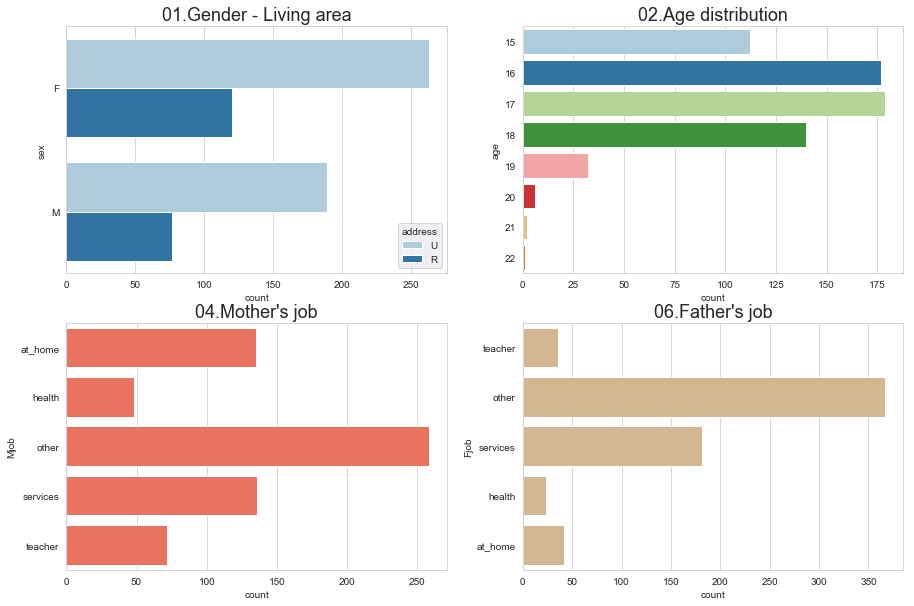

In [501]:
# Gender - Age - Add
fig,ax =plt.subplots(2,2, figsize=(15,10))
sns.set_style("darkgrid")
#sns.set_context(font_scale=10)
sns.countplot(y='sex', hue = 'address', data=data, ax=ax[0,0], palette="Paired").set_title("01.Gender - Living area", size=18)
sns.countplot(y='age', data=data, ax=ax[0,1], palette="Paired").set_title("02.Age distribution",size=18)
sns.countplot(y='Mjob', data=data, ax=ax[1,0], color='tomato').set_title("04.Mother's job",size=18)
sns.countplot(y='Fjob', data=data, ax=ax[1,1], color='burlywood').set_title("06.Father's job",size=18)
plt.show()

/Users/chhquyen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


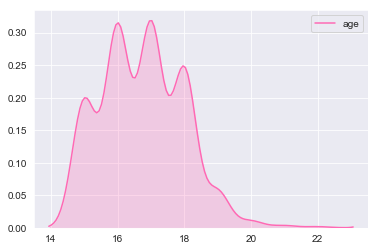

In [502]:
sns.kdeplot(data['age'], shade=True, color="hotpink")
#plt.suptitle("The ghost" fontsize=20)
plt.show()

/Users/chhquyen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


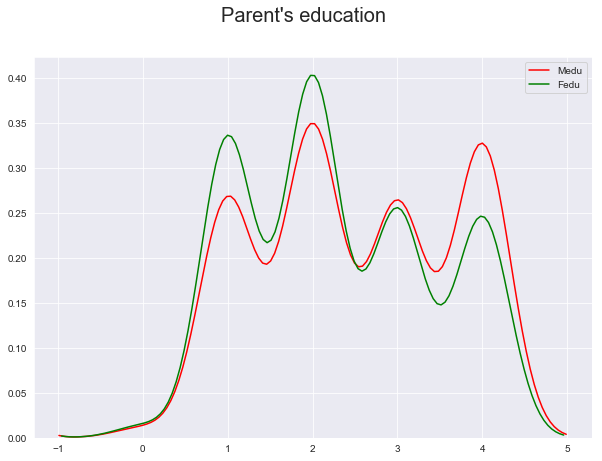

In [503]:
# Mother and Father education:
plt.figure(figsize=(10,7))
sns.kdeplot(data['Medu'], shade=False, color="r")
sns.kdeplot(data['Fedu'], shade=False, color="green")
plt.suptitle("Parent's education", fontsize=20)
plt.show()

**Remark: Pay attention to the x axes unit !**
    * The majority of questionaires are 15-18yrs. 
    * Less Mother finish primary to 9th grade than Father, but more Mother pursue higher education.   
    * Father's jobs in others & services are higher than Mother's, while there are more Mothers work in Health section & Teaching, and the number of stay-at-home Mother is tripple Father's. 

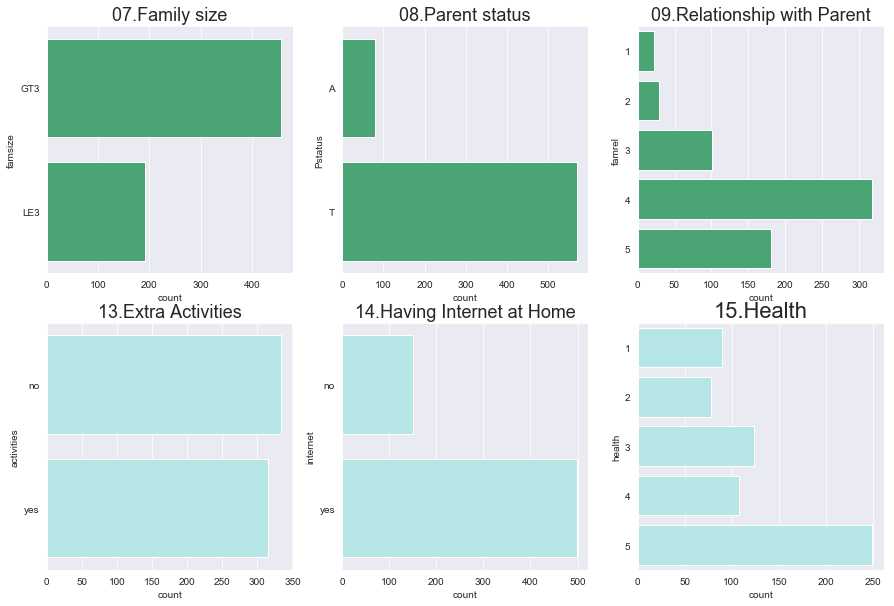

In [504]:
# Famsize - Pstatus - Famrel 
# Study time - Freetime - Activities - Goout - Internet -  Health
fig,ax =plt.subplots(2,3, figsize=(15,10))
sns.set_style("darkgrid")
sns.countplot(y='famsize', data=data, ax=ax[0,0], color = 'mediumseagreen').set_title("07.Family size",size=18)
sns.countplot(y='Pstatus', data=data, ax=ax[0,1],color = 'mediumseagreen').set_title("08.Parent status",size=18)
sns.countplot(y='famrel', data=data, ax=ax[0,2],color = 'mediumseagreen').set_title("09.Relationship with Parent",size=18)
sns.countplot(y='activities', data=data, ax=ax[1,0],color = 'paleturquoise').set_title("13.Extra Activities",size=18)
sns.countplot(y='internet', data=data, ax=ax[1,1],color = 'paleturquoise').set_title("14.Having Internet at Home",size=18)
sns.countplot(y='health', data=data, ax=ax[1,2],color = 'paleturquoise').set_title("15.Health",size=22)
plt.show()

/Users/chhquyen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


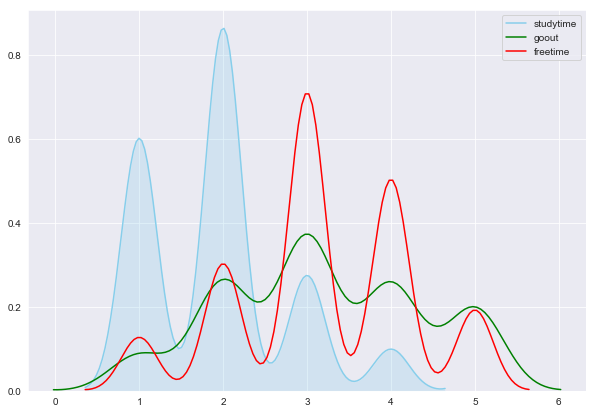

In [505]:
plt.figure(figsize=(10,7))
sns.kdeplot(data['studytime'], shade=True, color='skyblue')
sns.kdeplot(data['goout'], shade=False, color="green")
sns.kdeplot(data['freetime'], shade=False, color="r")
plt.show()

**Remark: A peaceful lifestyle.**
    * Most of families are still living together and have a goood relationship. 
    * Most Student spend only 1-5h/week for studying and have plenty time to relax and do extra activities. 
    * Surprisingly, over 150 students report a bad health status. 

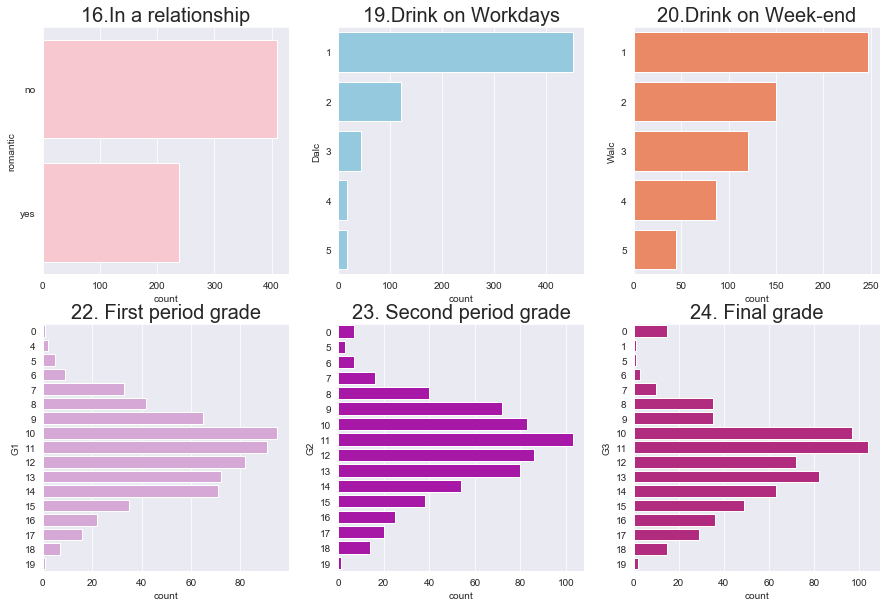

In [506]:
# Romantic - Past Class Failure - Higher Education
# Dalc - Walc - Absences
# G1 - G2 - G3 
fig,ax =plt.subplots(2,3, figsize=(15,10))
sns.countplot(y='romantic', data=data, ax=ax[0,0], color = 'pink').set_title("16.In a relationship",size=20)
sns.countplot(y='Dalc', data=data, ax=ax[0,1],color = 'skyblue').set_title("19.Drink on Workdays",size=20)
sns.countplot(y='Walc', data=data, ax=ax[0,2],color = 'coral').set_title("20.Drink on Week-end",size=20)
sns.countplot(y='G1', data=data, ax=ax[1,0],color = 'plum').set_title("22. First period grade",size=20)
sns.countplot(y='G2', data=data, ax=ax[1,1],color = 'm').set_title("23. Second period grade",size=20)
sns.countplot(y='G3', data=data, ax=ax[1,2],color = 'mediumvioletred').set_title("24. Final grade",size=20)
plt.show()

**Remark no3: All are under control**
    * ONE-THIRD is in a romantic relationship - which is phenomenal compares to my college time T^T.
    * Drinking levels& number increase significantly in week-end.   
    * The final grade shows an interesting growth: more medium scores (10,12), more lowest score (0). 

# Part II. CLOSER OBSERVATION: Get ready for some (more) plots! 


## **A - HOW ARE THE DRINKERS DOING?**
     Ok so we've have some general ideas about the student group we are studying, now let's get closer and dig more on what we are curious about: the Drinkers! We are going to find out the medium-to-heavy drinkers' student life. 
     Our study object in this part is the group of Drinker lev 3-4-5 separated by Weekdays and Weekend. 
  

In [507]:
# Sub dataset
Wd_drink = data.Dalc >= 3 
We_drink = data.Walc >= 3

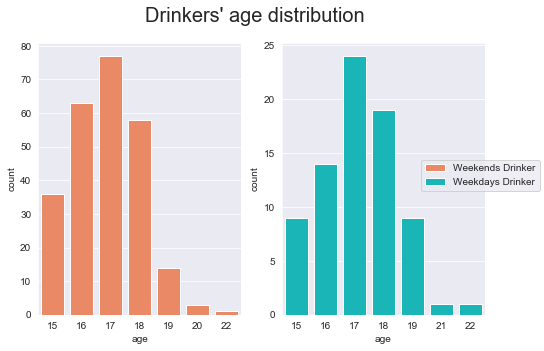

In [508]:
# Gender distribution
fig,ax =plt.subplots(1,2, figsize=(8,5))     
sns.set_context(font_scale=1)
sns.countplot(data[We_drink]['age'], label='Weekends Drinker', ax=ax[0], color ="coral")
sns.countplot(data[Wd_drink]['age'], label="Weekdays Drinker", ax=ax[1], color="darkturquoise")
plt.suptitle("Drinkers' age distribution", fontsize=20)
fig.legend(loc=7)
plt.show()

/Users/chhquyen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


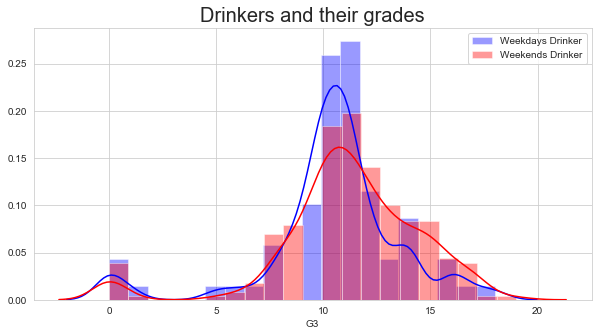

In [509]:
# The Drinkers grades
# Take the group lev4+5 in Dalc+Walc, distplot with final grade G3 
plt.figure(figsize=(10,5))
sns.set_context(font_scale=0.5)
sns.set_style("whitegrid")
sns.distplot(data[Wd_drink]['G3'], label="Weekdays Drinker",color='b',)
sns.distplot(data[We_drink]['G3'], label='Weekends Drinker',color='r')
plt.title('Drinkers and their grades',size=20)
plt.legend()
plt.show()

**Remark:**
    * Not bad! Contrast to my prejudice, drinkers have quite good grade. Drinkers on Week-ends even manage to get high grades more than Weekdays Drinker. But it somehow makes sense, how can you focus on studying on weekdays if you are drunk right?!

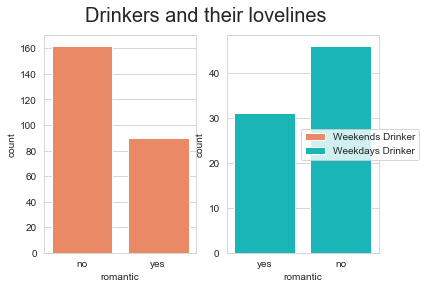

In [510]:
fig,ax =plt.subplots(1,2)     
sns.countplot(data[Wd_drink]['romantic'], label="Weekdays Drinker", ax=ax[1], color="darkturquoise")
sns.countplot(data[We_drink]['romantic'], label='Weekends Drinker', ax=ax[0], color="coral")
plt.suptitle('Drinkers and their lovelines', fontsize=20)
fig.legend(loc=7)
plt.show()

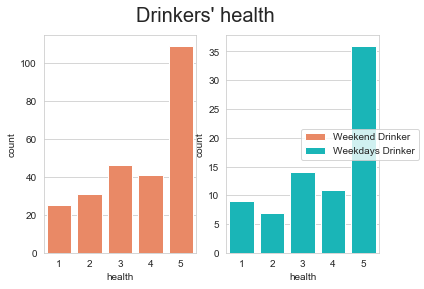

In [511]:
fig,ax =plt.subplots(1,2)
sns.countplot(data[We_drink]['health'], label='Weekend Drinker', ax=ax[0], color ="coral")
sns.countplot(data[Wd_drink]['health'], label="Weekdays Drinker", ax=ax[1], color ='darkturquoise')
plt.suptitle("Drinkers' health", fontsize=20)
fig.legend(loc=7)
plt.show()

**Remark:**
    * Both groups claim that thay have good health situation, hope this is not an illusion. Anyway they are in their young ages so I guess this is understandable. 

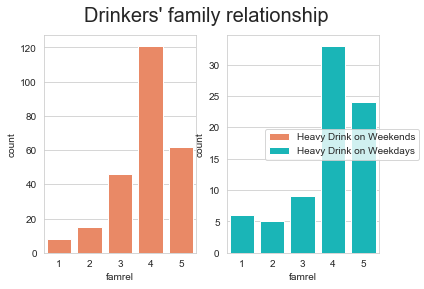

In [512]:
fig,ax =plt.subplots(1,2)
sns.countplot(data[We_drink]['famrel'], label='Heavy Drink on Weekends', ax=ax[0], color ="coral")
sns.countplot(data[Wd_drink]['famrel'], label="Heavy Drink on Weekdays", ax=ax[1], color ='darkturquoise')
plt.suptitle("Drinkers' family relationship", fontsize=20)
fig.legend(loc=7)
plt.show()

**Remark:**
    * All good here! 

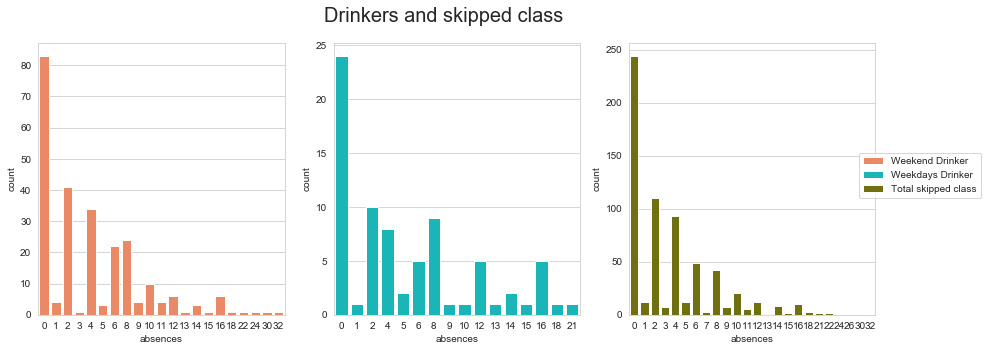

In [513]:
fig,ax =plt.subplots(1,3, figsize=(15,5))
sns.countplot(data[We_drink]['absences'], label='Weekend Drinker', ax=ax[0], color ="coral")
sns.countplot(data[Wd_drink]['absences'], label="Weekdays Drinker", ax=ax[1], color ='darkturquoise')
sns.countplot(data['absences'], label='Total skipped class', ax=ax[2], color ="olive")
plt.suptitle('Drinkers and skipped class', fontsize=20)
fig.legend(loc=7)
plt.show()

#want to do: pie chart percentage of Skipped class group by 0-5, 6-10, 10-15, >15

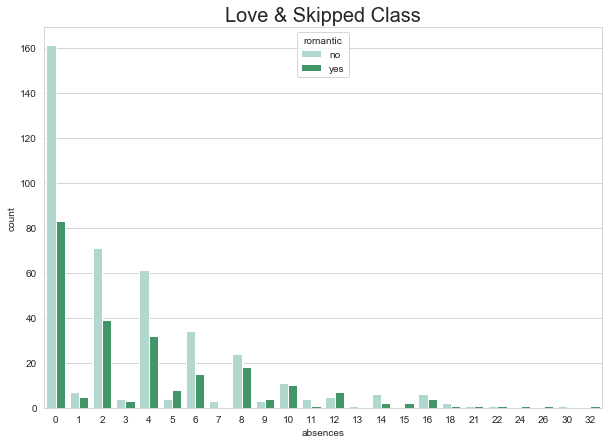

In [514]:
# Extra: In a relationship vs Absences
plt.figure(figsize=(10,7))
sns.set_context(font_scale=0.1)
sns.countplot(x='absences', hue='romantic', data=data, palette="BuGn").set_title("Love & Skipped Class",size=20)     
plt.show()


## **B -  GRADES & OTHER FEATURES**

    * Let's step back a bit and look at grades in general to see if there is anything interesting

/Users/chhquyen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


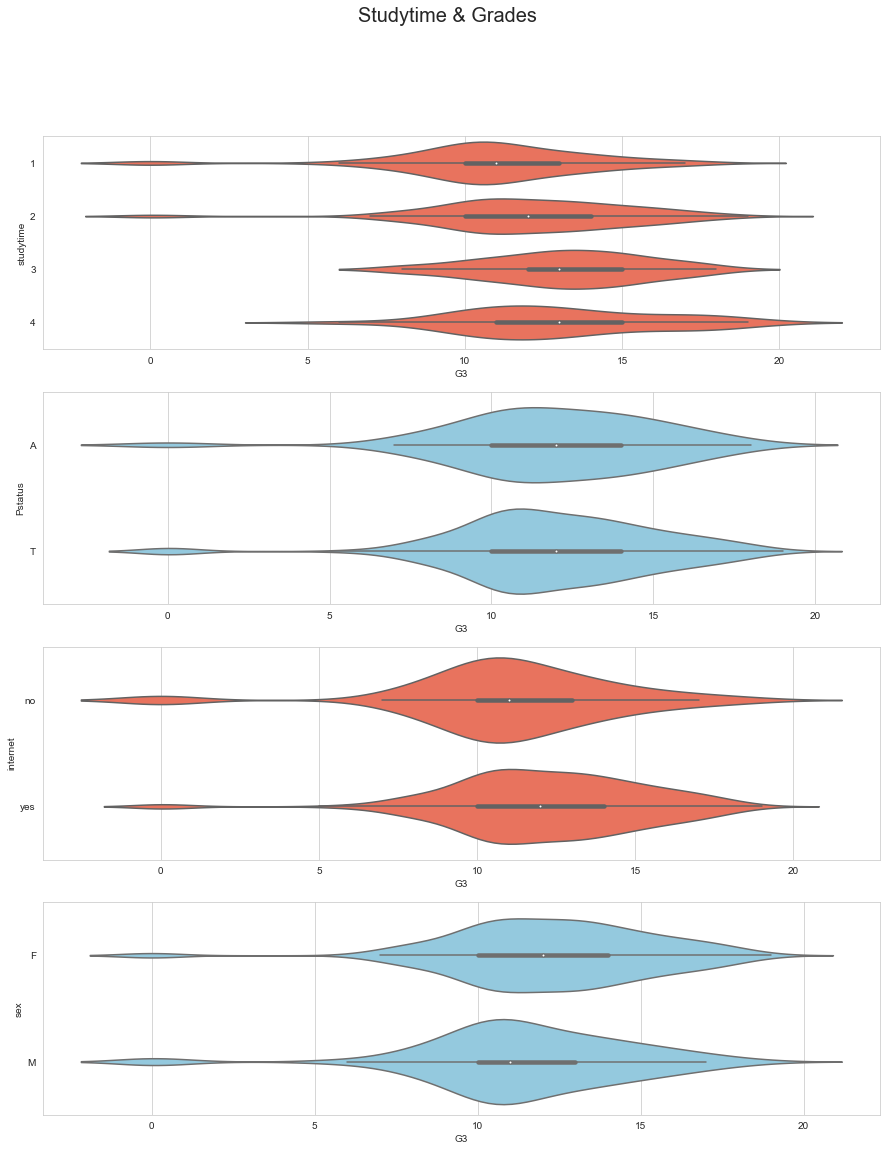

In [515]:
# Final Grades (G3) + Mom's job/Mom edu, Grades + Dad's job/Dad Edu
# Final Grades (G3) + study time, free time, fam relationship

fig,ax =plt.subplots(4,1, figsize=(15,18))
sns.set_context(font_scale=2)
sns.violinplot(y="studytime", x="G3", data = data , orient="h", ax=ax[0],color = 'tomato')
sns.violinplot(y="Pstatus", x="G3", data = data , orient="h", ax=ax[1],color = 'skyblue')
sns.violinplot(y="internet", x="G3", data = data , orient="h", ax=ax[2],color = 'tomato')
sns.violinplot(y="sex", x="G3", data = data , orient="h", ax=ax[3],color = 'skyblue')
plt.suptitle("Studytime & Grades", fontsize=20)
plt.show()

/Users/chhquyen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


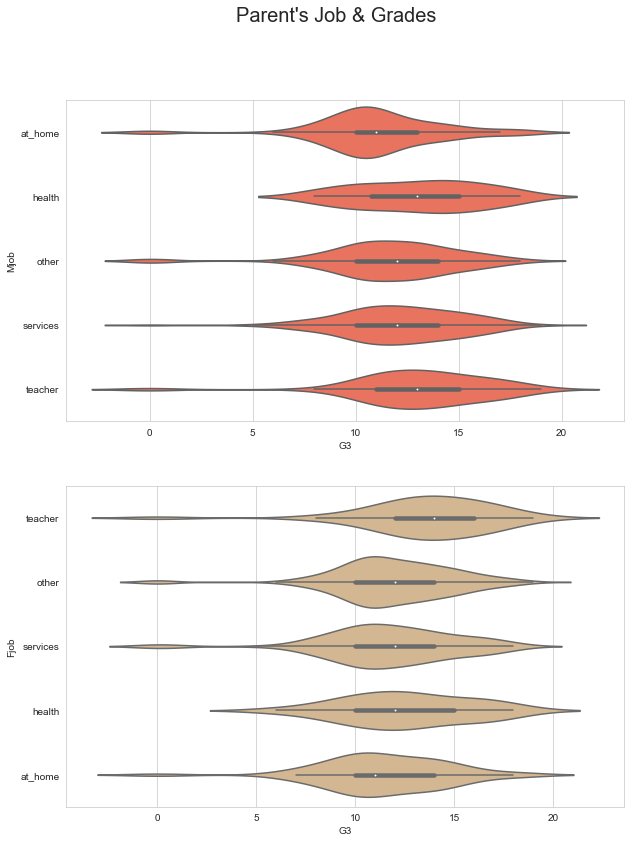

In [516]:
fig,ax =plt.subplots(2,1, figsize=(10,13))
sns.set_context(font_scale=2)
sns.violinplot(y="Mjob", x="G3", data = data , orient="h", ax=ax[0],color = 'tomato')
sns.violinplot(y="Fjob", x="G3", data = data , orient="h", ax=ax[1],color = 'burlywood') 
plt.suptitle("Parent's Job & Grades", fontsize=20)
plt.show()

**Remark:** 
    * Teacher & Heathcare mother's kids tend to have higher score than other moms' kids.Same with Teacher dad
    * Both Stay-at-home Mom & Dad's kids have lowest score on average. 

/Users/chhquyen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


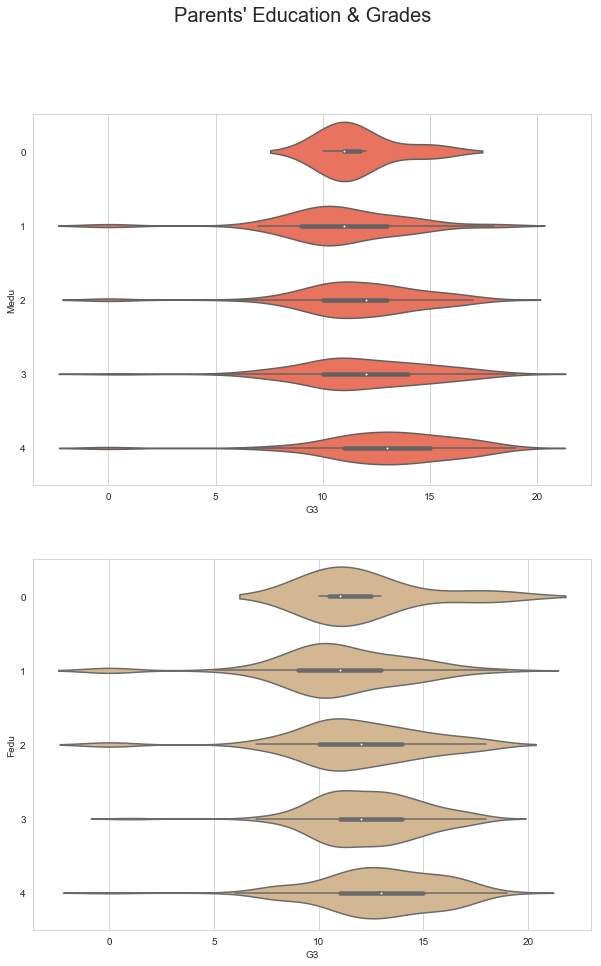

In [517]:
fig,ax =plt.subplots(2,1, figsize=(10,15))
sns.set_context(font_scale=2)
sns.violinplot(y="Medu", x="G3", data = data , orient="h", ax=ax[0], color ='tomato')
sns.violinplot(y="Fedu", x="G3", data = data , orient="h", ax=ax[1], color='burlywood' )
plt.suptitle("Parents' Education & Grades", fontsize=20)
plt.show()

**Remark:** 
    * Mother & Father who have Higher education tend to have kids who have higher score. 

## **C -  Correlation between features - Decisive factor for having a good grade?**

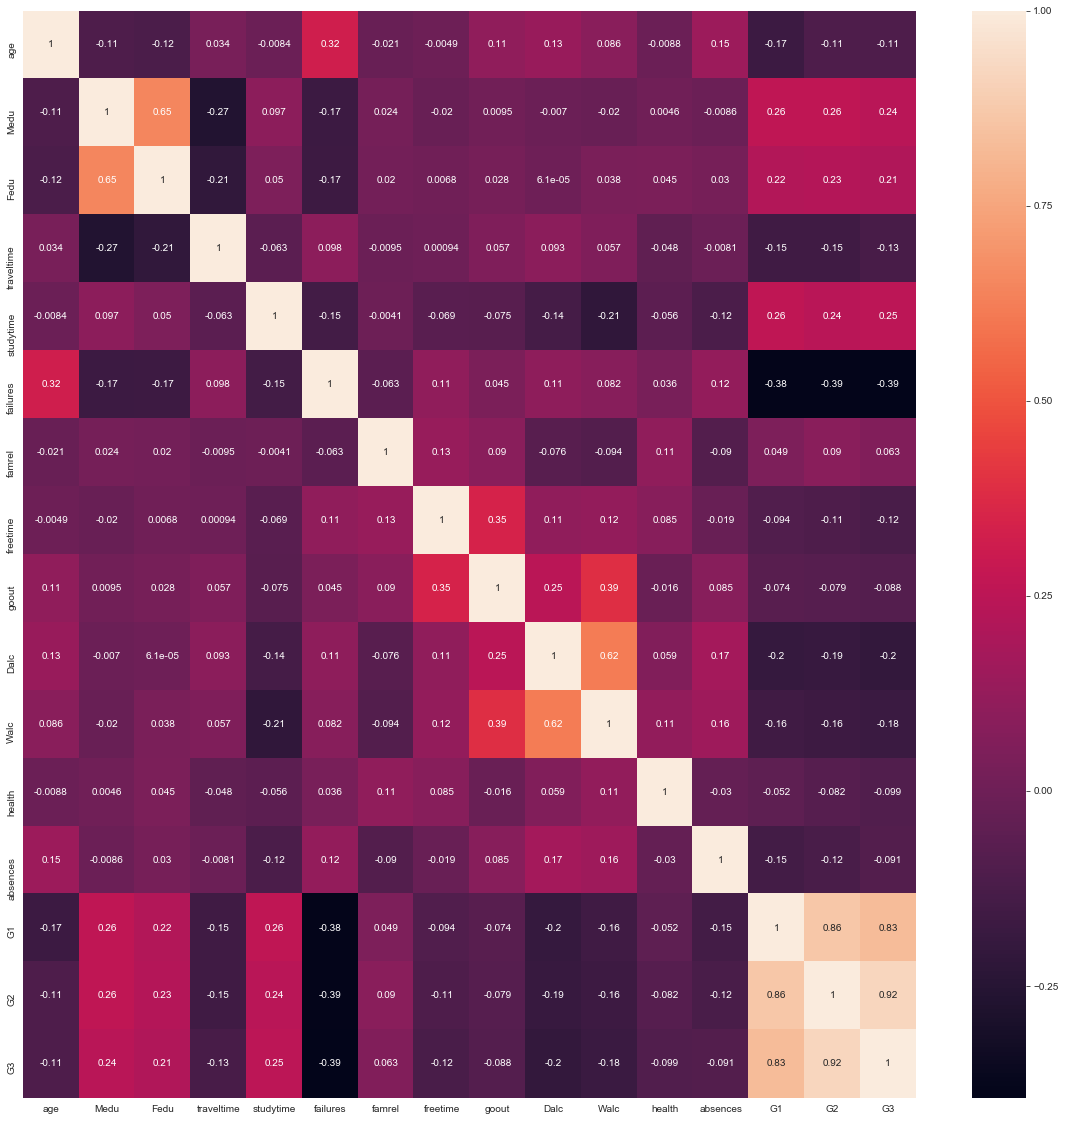

In [518]:
correlation=data.corr()
plt.figure(figsize=(20,20))
sns.set_context(font_scale=2)
sns.heatmap(correlation, annot=True,)
plt.show()

**Conclus:** 
    * Parents' education: Fedu & Medu = 0.65 = highly connected? Interesting to investigate!
    * Medu always has slightly higher correlation with kid's grades than Fedu's. 
    * G1,  G2 have significant important roles to define final grade G3 (0.83-0.92). G2&G1 are important with each other too (0.86). 
    * If you drink on weekdays, there are 62% chance that you gonna drink in the week-end too. 
    * Drinking habit has NO correlation with grades at all ! 
    
**My advice?** 
    * Try hard on G1 & G2 to have a solid foundation for the final score. 
    * Then you can have some drink on week-end or even sometime on weekdays, have a gf/bf and still be safe with your parents ;) 

## PART III - Predict Fail/Pass 

In [519]:
# Convert all non-int category into dummy variables
data = pd.get_dummies(data, columns=None, drop_first=True)

In [520]:
# Add new column name "pass" as we are going to predict if student'd pass or fail the final exam.
data['pass'] = data['G3']>=10  

In [521]:
# Verify if the column was added well to the data set: 
data.head(4)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,pass
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,1,1,0,0,True
1,17,1,1,1,2,0,5,3,3,1,...,0,0,1,0,0,0,1,1,0,True
2,15,1,1,1,2,0,4,3,2,2,...,0,1,0,0,0,1,1,1,0,True
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,0,1,1,1,1,1,True


In [522]:
# We drop some columns less important to help the model runs more accuracy: 
# Since we will evaluate the final grade G3, while G1 & G2 have highly connected to G3 - all these grades columns need to be dropped
drop_columns = ['age','freetime','failures','traveltime','absences','G1','G2','G3','pass']
X = data.drop(columns=drop_columns)
y = data['pass']


#Train & Test model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [523]:
# Random Forest and Decision Tree: 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rfc= RandomForestClassifier()
dtc = DecisionTreeClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [524]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [525]:
# Random Forest model accuracy score: 
rfc_prediction = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_prediction)
print(rfc_acc)

0.8307692307692308


In [526]:
# Decision Tree model accuracy score: 
dtc_prediction = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_prediction)
print(dtc_acc)


0.7846153846153846


In [527]:
from sklearn.metrics import classification_report, confusion_matrix

In [528]:
report = classification_report(y_test, dtc_prediction)
print(report)

             precision    recall  f1-score   support

      False       0.31      0.33      0.32        30
       True       0.88      0.87      0.87       165

avg / total       0.79      0.78      0.79       195



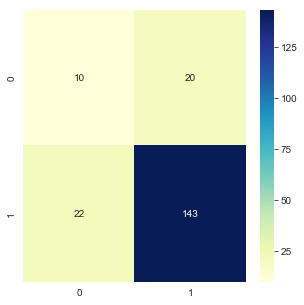

In [529]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,dtc_prediction),cmap="YlGnBu", annot=True, fmt="d")
plt.show()

In [530]:
confusion_matrix(y_test, dtc_prediction)

array([[ 10,  20],
       [ 22, 143]])